In [1]:
import numpy as np
%matplotlib inline
import pylab

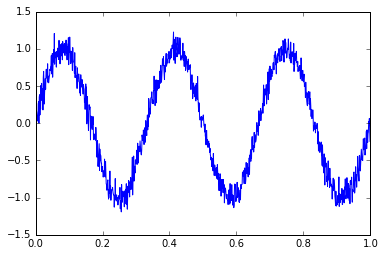

In [4]:
t = np.arange(0, 1, 0.001) # t is our x-axis times
s = np.sin(2 * np.pi * 3 * t) + 0.1 * np.random.randn(1000) # s is our fake signal
pylab.plot(t, s) # plot s vs t

In [59]:
def esmooth(X, alpha):
    Ri = []
    for i in range(len(X)):
        if i >=1:
            new= (alpha*X[i]+(1-alpha)*Ri[i-1])
            Ri.append(new)
        else:
            Ri.append(X[i])
    return np.asarray(Ri)
esmooth([1,3,2,4], .5)

array([ 1.,  2.,  2.,  3.])

In [26]:
def esmooth2(X, alpha):
    R = np.zeros_like(X)
    R[0]=X[0]
    for i in range(1,len(X)):
        R[i] = alpha*X[i] + (1-alpha)*R[i-1]
    return R
esmooth2([1,3,2,4], .5)

array([1, 2, 2, 3])

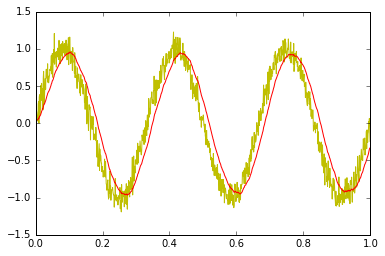

In [60]:
ss = esmooth(s, 0.05)
pylab.plot(t, s, 'y')
pylab.plot(t, ss, 'r')

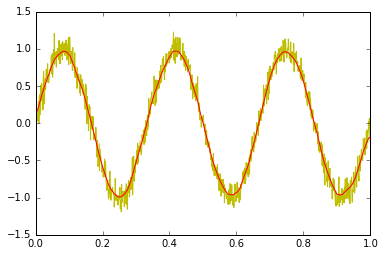

In [57]:
def bdesmooth(X, alpha):
    '''Exponential smoothing in both directions'''
    # take the square root of alpha because it will be applied twice
    sqralpha = np.sqrt(alpha)
    B= esmooth2(X, sqralpha)
    C = esmooth2(B[::-1], sqralpha)
    D = C[::-1]
    return D
sss = bdesmooth(s, .01)
pylab.plot(t, s, 'y')
pylab.plot (t, sss, 'r')